<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. **Import Libraries:**

   - `numpy` for numerical operations.
   - `matplotlib.pyplot` for plotting images and graphs.
   - `skimage` functions to load sample images.

2. **Load and Preprocess the Image:**

   - Use `data.camera()` to load a sample grayscale image.
   - Normalize the pixel values to the range `[0, 1]`.

3. **Display the Original Image:**

   - Use `plt.imshow()` to display the original grayscale image.

4. **Compute \( A^T A \):**

   - Calculate the Gram matrix `AtA` by multiplying the transpose of `A` with `A`.

5. **Eigenvalue Decomposition:**

   - Use `np.linalg.eigh()` to compute the eigenvalues and eigenvectors of the symmetric matrix `AtA`.
   - `eigh()` is used for Hermitian or symmetric matrices, which is appropriate for `AtA`.

6. **Sort Eigenvalues and Eigenvectors:**

   - Sort in **decreasing order** because `eigh()` returns them in increasing order.
   - Use `np.argsort()` to get the sorted indices.

7. **Compute Singular Values:**

   - Singular values are the square roots of the eigenvalues of `AtA`.
   - Handle small negative eigenvalues (due to numerical errors) by setting them to zero before taking the square root.

8. **Compute \( U \) Matrix:**

   - Compute `Sigma_inv`, the inverse of the diagonal matrix of singular values, adding a small epsilon to avoid division by zero.
   - Calculate `U` using $ U = A V \Sigma^{-1}  $.
   - Normalize the columns of `U` for numerical stability.

9. **Low-Rank Approximation:**

   - For each rank `k` in `k_values`, truncate `U`, `S`, and `Vt` to the first `k` components.
   - Reconstruct the image using $ A_k = U_k \Sigma_k V_k^T  $.
   - Compute the approximation error using the Frobenius norm.

10. **Display Reconstructed Images:**

    - Use `plt.imshow()` to display the reconstructed images for each selected rank `k`.
    - Print the rank and corresponding approximation error.

11. **Plot Approximation Error vs. Rank \( k \):**

    - Plot the approximation error against the rank to visualize how the error decreases as the rank increases.





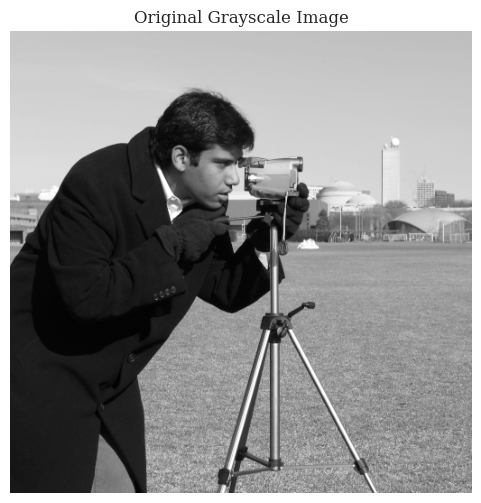

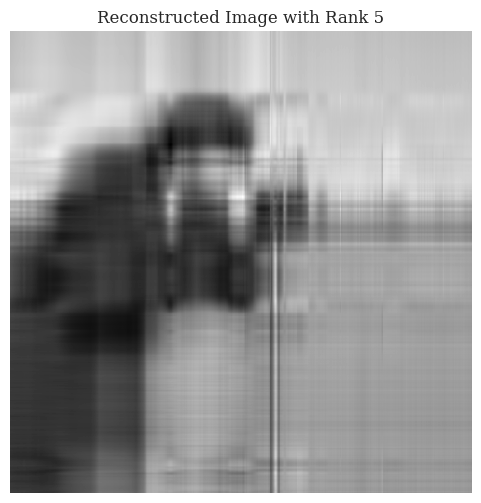

Rank: 5, Approximation Error (Frobenius Norm): 51.32


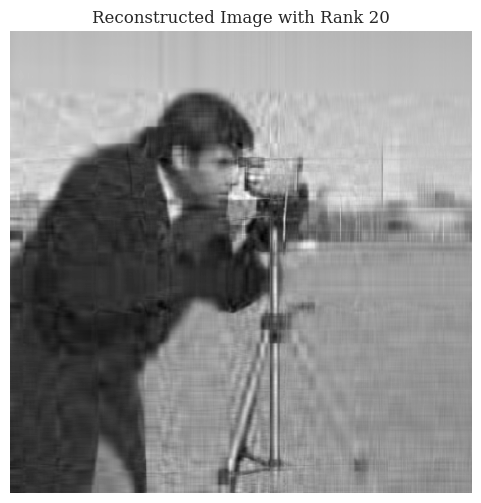

Rank: 20, Approximation Error (Frobenius Norm): 30.20


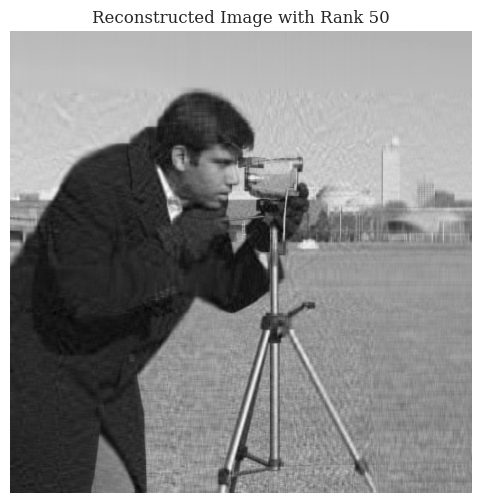

Rank: 50, Approximation Error (Frobenius Norm): 18.96


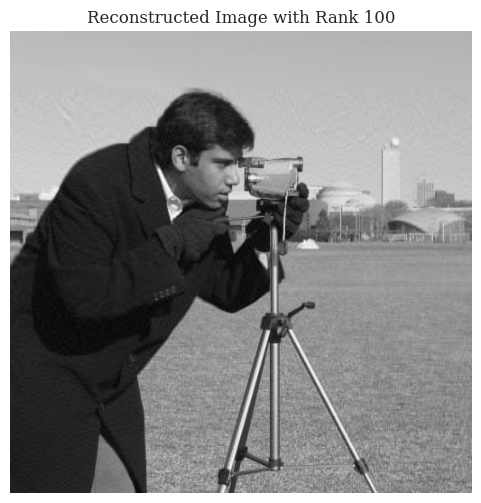

Rank: 100, Approximation Error (Frobenius Norm): 11.73


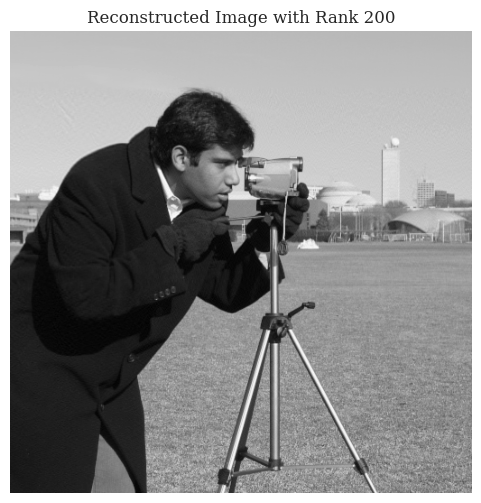

Rank: 200, Approximation Error (Frobenius Norm): 5.26


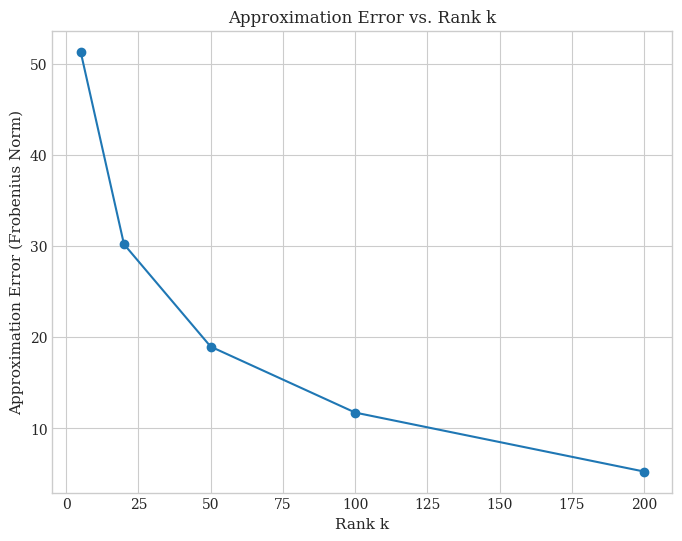

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, data

# Load a sample image provided by scikit-image
image = data.camera()  # You can use other images like data.astronaut(), data.coins(), etc.

# The image is already in grayscale
gray_image = image / 255.0  # Normalize pixel values to [0, 1]
A = gray_image  # Rename for clarity

# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(A, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Compute A^T A (Gram matrix)
AtA = np.dot(A.T, A)

# Compute eigenvalues and eigenvectors of A^T A
eigvals, V = np.linalg.eigh(AtA)

# Sort the eigenvalues and eigenvectors in decreasing order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
V = V[:, idx]

# Compute singular values (square roots of eigenvalues)
# Handle small negative eigenvalues due to numerical errors
eigvals = np.where(eigvals > 0, eigvals, 0)
singular_values = np.sqrt(eigvals)

# Compute U matrix
# Avoid division by zero by adding a small epsilon to singular values
epsilon = 1e-10
Sigma_inv = np.diag(1 / (singular_values + epsilon))
U = np.dot(A, np.dot(V, Sigma_inv))

# Normalize columns of U (optional, for numerical stability)
U = U / np.linalg.norm(U, axis=0)

# Now proceed with low-rank approximation
# Define a range of k values for the approximation
k_values = [5, 20, 50, 100, 200]

# Initialize a list to store approximation errors
errors = []

# Loop over k values
for k in k_values:
    # Truncate U, singular_values, V to rank k
    U_k = U[:, :k]
    S_k = singular_values[:k]
    Vt_k = V[:, :k].T

    # Reconstruct the approximated image
    reconstructed_image = np.dot(U_k, np.dot(np.diag(S_k), Vt_k))

    # Compute the approximation error
    error = np.linalg.norm(A - reconstructed_image, 'fro')
    errors.append(error)

    # Display the reconstructed image for selected k values
    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image with Rank {}'.format(k))
    plt.axis('off')
    plt.show()
    print("Rank: {}, Approximation Error (Frobenius Norm): {:.2f}".format(k, error))

# Plot the approximation error versus k
plt.figure(figsize=(8, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Approximation Error vs. Rank k')
plt.xlabel('Rank k')
plt.ylabel('Approximation Error (Frobenius Norm)')
plt.grid(True)
plt.show()






**Understanding the Results:**

- **Reconstructed Images:**

  - With a low rank \( k \), the images are blurry and lack detail.
  - As \( k \) increases, more details are captured, and the reconstructed image becomes closer to the original.

- **Approximation Error:**

  - The Frobenius norm of the error decreases as \( k \) increases.
  - This indicates that higher ranks capture more information from the original image.

- **Error Plot:**

  - The plot shows the relationship between the rank \( k \) and the approximation error.
  - It helps in choosing an appropriate \( k \) based on the desired balance between compression and image quality.

**Notes:**

- **Eigenvalue Decomposition vs. SVD:**

  - The eigenvalue decomposition of $  A^T A  $ helps in computing the SVD since the right singular vectors of $ A $ are the eigenvectors of $ A^T A $.
  - The singular values are the square roots of the eigenvalues of $ A^T A $.

- **Numerical Stability:**

  - Small negative eigenvalues can occur due to numerical errors; we set them to zero before taking the square root.
  - Adding a small epsilon when computing the inverse of singular values prevents division by zero.

- **Normalization:**

  - Normalizing the columns of `U` can improve numerical stability, especially when dealing with floating-point operations.

- **Limitations:**

  - This method is computationally intensive for large images because it involves eigenvalue decomposition of large matrices.
  - In practice, optimized algorithms and libraries are preferred for efficiency and accuracy.


**Considerations:**

- **Performance:**

  - The computation may take a significant amount of time, especially for larger images.
  - If performance is an issue, consider resizing the image to a smaller resolution.

- **Memory Usage:**

  - Storing and processing large matrices can consume a lot of memory.
  - Ensure your system has sufficient resources.

- **Usage in Practice:**

  - For practical applications, use optimized SVD functions provided by libraries, which are highly efficient and handle numerical issues internally.

**With np.linalg.svd**

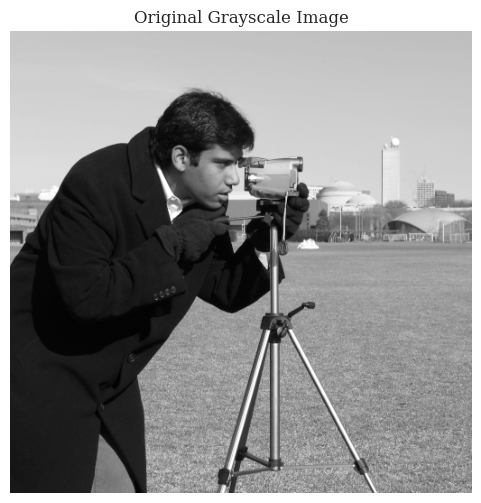

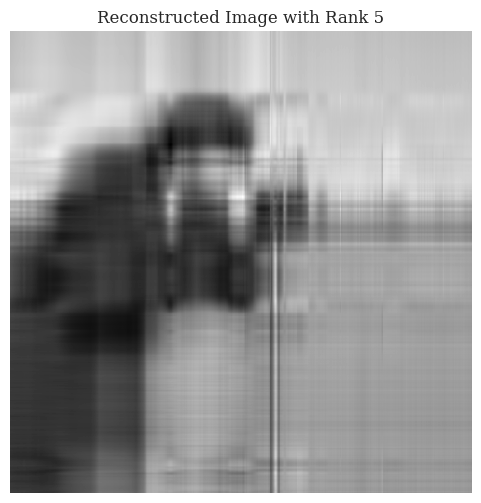

Rank: 5, Approximation Error (Frobenius Norm): 51.32


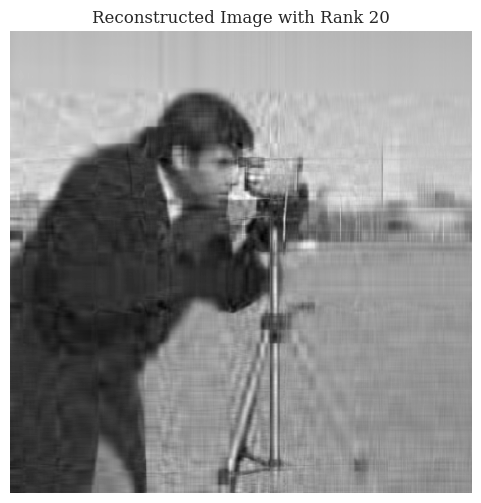

Rank: 20, Approximation Error (Frobenius Norm): 30.20


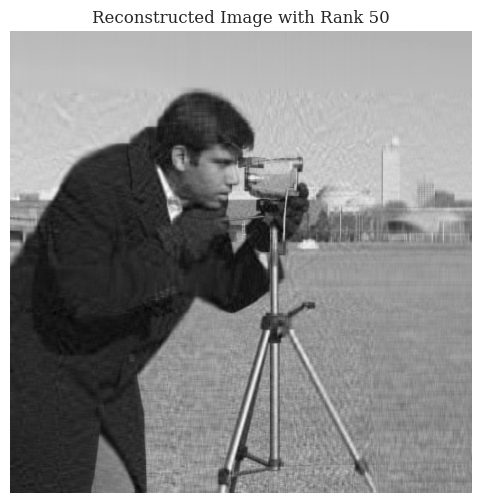

Rank: 50, Approximation Error (Frobenius Norm): 18.96


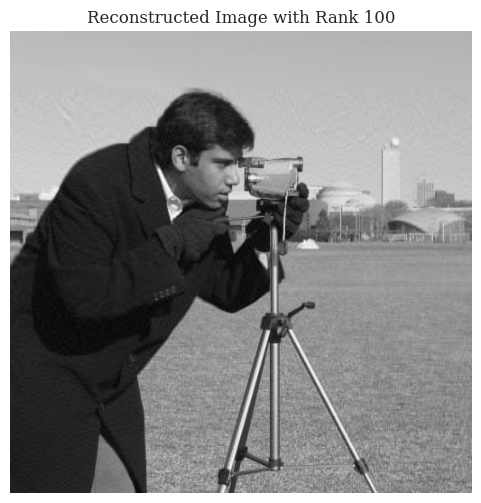

Rank: 100, Approximation Error (Frobenius Norm): 11.73


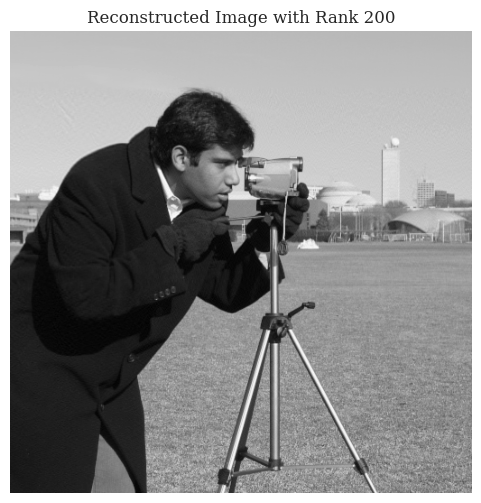

Rank: 200, Approximation Error (Frobenius Norm): 5.26


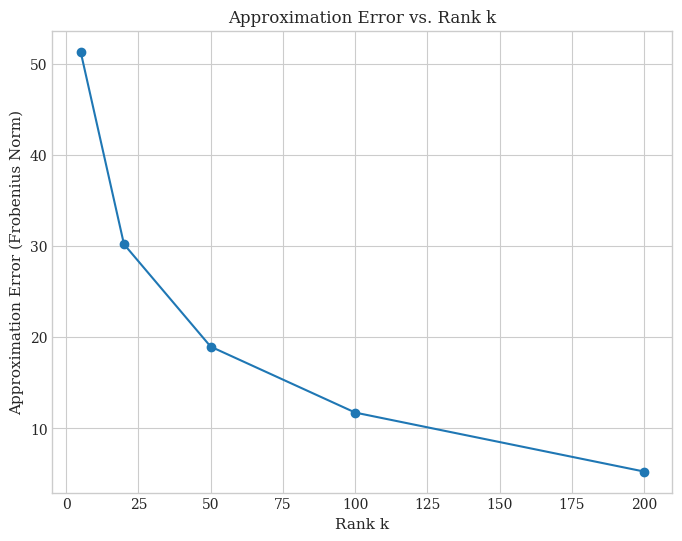

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, data

# Load a sample image provided by scikit-image
image = data.camera()  # You can use other images like data.astronaut(), data.coins(), etc.

# The image is already in grayscale
gray_image = image / 255.0  # Normalize pixel values to [0, 1]

# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Compute the SVD of the grayscale image matrix
U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

# Define a range of k values for the approximation
k_values = [5, 20, 50, 100, 200]

# Initialize a list to store approximation errors
errors = []

# Loop over k values
for k in k_values:
    # Truncate U, S, Vt to rank k
    U_k = U[:, :k]
    S_k = S[:k]
    Vt_k = Vt[:k, :]

    # Reconstruct the approximated image
    reconstructed_image = U_k @ np.diag(S_k) @ Vt_k

    # Compute the approximation error
    error = np.linalg.norm(gray_image - reconstructed_image, 'fro')
    errors.append(error)

    # Display the reconstructed image for selected k values
    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image with Rank {}'.format(k))
    plt.axis('off')
    plt.show()
    print("Rank: {}, Approximation Error (Frobenius Norm): {:.2f}".format(k, error))

# Plot the approximation error versus k
plt.figure(figsize=(8, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Approximation Error vs. Rank k')
plt.xlabel('Rank k')
plt.ylabel('Approximation Error (Frobenius Norm)')
plt.grid(True)
plt.show()
